# Лабораторная работа №1
## Кластерный иерархический анализ на датафрейме "digit"

# KMeans

In [30]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import os

In [31]:
from src.config import FILE_DIGIT, ENCODINGS

In [32]:
os.chdir(r"C:\Users\print\OneDrive\Рабочий стол\Data_Analysis_in_Python\DA_on_python_labs\data")

#### Выполнена базовая подготовка к работе


In [33]:
df = pd.read_csv(FILE_DIGIT, encoding=ENCODINGS[0], sep=';')

In [34]:
df.head(5)

,A,B,C,D,E,F,G,H,A2,B2,C2,D2,E2,F2,G2,H2
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       500 non-null    object
 1   B       500 non-null    object
 2   C       500 non-null    object
 3   D       500 non-null    object
 4   E       500 non-null    object
 5   F       500 non-null    object
 6   G       500 non-null    object
 7   H       500 non-null    object
 8   A2      500 non-null    object
 9   B2      500 non-null    object
 10  C2      500 non-null    object
 11  D2      500 non-null    object
 12  E2      500 non-null    object
 13  F2      500 non-null    object
 14  G2      500 non-null    object
 15  H2      500 non-null    object
dtypes: object(16)
memory usage: 62.6+ KB


In [36]:
df.shape

(500, 16)

По какой-то причине данные в нашей таблице дублируются. Появились лишние 8 столбцов. Избавимся от них


Также при визуальном осмотре данных я выявил, что некоторые данные записаны с дополнительными пробелами, так что для начала избавимся от них

In [37]:
df = df.astype("string").apply(lambda s: s.str.strip())

In [38]:
drop_cols = [c for c in df.columns if c.endswith("2")]
df = df.drop(columns=drop_cols)

In [39]:
df.head(5)

,A,B,C,D,E,F,G,H
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE


Мы подготовили наш датафрейм для дальнейшей работы, но еще лучше перевести ONE и ZERO в числовой формат, для удобной работы с числами

In [40]:
for col in df.columns:
    print(col, "->", sorted(df[col].unique()))

A -> ['eight', 'five', 'four', 'nine', 'one', 'seven', 'six', 'three', 'two', 'zero']
B -> ['ONE', 'ZERO']
C -> ['ONE', 'ZERO']
D -> ['ONE', 'ZERO']
E -> ['ONE', 'ZERO']
F -> ['ONE', 'ZERO']
G -> ['ONE', 'ZERO']
H -> ['ONE', 'ZERO']


Убедились, что никаких других значений нет

In [41]:
seg_cols = list("BCDEFGH")
Y = df['A']
X = (df[seg_cols]
       .apply(lambda s: s.str.strip())
       .replace({"ONE": "1", "ZERO": "0"})
       .astype("int8"))


In [42]:
X.head(5)

,B,C,D,E,F,G,H
0,1,0,1,0,0,1,0
1,0,0,1,0,0,1,0
2,0,1,1,1,0,1,0
3,1,1,1,1,1,0,0
4,0,1,1,1,1,1,1


In [43]:
Y.head(5)

0    seven
1      one
2     four
3      two
4    eight
Name: A, dtype: string

In [44]:
X_KM = X.copy()
Y_KM = Y.copy()
X_DBS = X.copy()
Y_DBS = Y.copy()

Теперь данные нормализованы и можно приступать к кластеризации

In [45]:
from sklearn.cluster import KMeans

os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "2"
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak*")

In [46]:
K = range(1, 20)

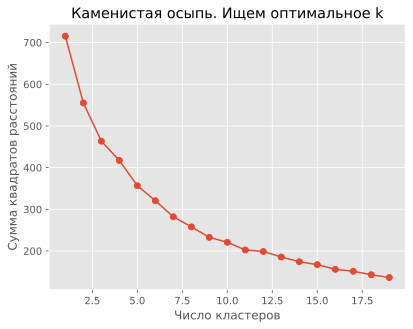

In [47]:
models = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_KM) for k in K]
dist = [model.inertia_ for model in models] # inertia - Ws

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь. Ищем оптимальное k');


In [48]:
max_iter_1 = 500

In [49]:
model = KMeans(n_clusters=10, max_iter=max_iter_1, random_state=42, n_init=10, verbose=0, tol=0.0001)
model.fit(X_KM)

KMeans(max_iter=500, n_clusters=10, n_init=10, random_state=42)

In [50]:
X_KM['cluster'] = model.labels_
X_KM.groupby('cluster').mean()

,B,C,D,E,F,G,H
cluster,,,,,,,
0,0.851064,0.000000,0.829787,0.936170,0.829787,0.000000,0.893617
1,0.200000,0.872727,0.945455,0.927273,0.072727,0.909091,0.000000
2,0.847458,1.000000,1.000000,0.932203,0.000000,0.915254,1.000000
3,0.493333,0.066667,0.920000,0.000000,0.160000,0.906667,0.080000
4,0.880000,0.000000,1.000000,0.940000,0.000000,1.000000,0.800000
5,0.925000,0.925000,0.925000,0.000000,1.000000,0.900000,0.925000
6,0.896552,0.844828,0.000000,0.948276,0.000000,0.965517,0.913793
7,0.947368,0.824561,1.000000,1.000000,1.000000,0.912281,0.894737
8,0.769231,1.000000,0.000000,0.615385,0.923077,0.846154,0.000000


In [51]:
ct = pd.crosstab(X_KM["cluster"], Y_KM)
ct

A,eight,five,four,nine,one,seven,six,three,two,zero
cluster,,,,,,,,,,
0,0,0,2,1,0,1,0,3,39,1
1,3,1,41,4,5,1,0,0,0,0
2,6,5,5,34,0,1,0,5,0,3
3,0,0,0,0,37,36,0,0,0,2
4,1,0,1,7,1,5,0,35,0,0
5,2,0,0,1,0,0,3,1,1,32
6,1,42,0,6,0,2,3,4,0,0
7,40,2,0,1,0,1,1,7,2,3
8,1,1,3,0,0,1,6,0,0,1


При разбиении на 10 кластеров, у нас получился неплохой результат, в каждом кластере виден явный лидер, соответственно каждому кластеру соответствует своя цифра:

0) 7
1) 8
2) 2
3) 3
4) 9
5) 6
6) 4
7) 1
8) 5
9) 0

Также в результате есть некоторые выбросы, это изначально некорректно заданные/распознанные значения, в них лишняя деталь, либо наобоброт какой-то детали недостает

In [52]:
X_KM['Y'] = Y_KM
X_KM.sort_values('cluster').head(50)

,B,C,D,E,F,G,H,cluster,Y
312,1,0,1,1,1,0,1,0,two
32,1,0,1,1,1,0,1,0,two
33,1,0,1,1,1,0,1,0,two
433,1,0,1,1,1,0,1,0,two
282,1,0,0,1,1,0,1,0,two
431,1,0,1,1,1,0,1,0,two
428,1,0,1,1,1,0,1,0,two
240,1,0,1,1,0,0,1,0,two
349,1,0,0,1,0,0,1,0,two
350,1,0,1,1,1,0,1,0,two


возьмем строку 167:
167	1	0	1	0	1	0	1	0	seven
число попало в кластер 0 (кластер с двойками), схематически отрисуем его


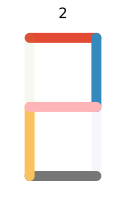

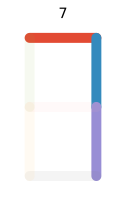

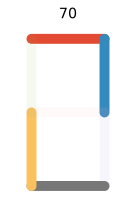

In [53]:
import matplotlib.pyplot as plt

# Какие сегменты включены для каждой цифры (7-сегментный индикатор)
DIGITS = {
    0: "abcfed",      # все кроме g
    1: "bc",
    2: "abged",
    3: "abgcd",
    4: "fgbc",
    5: "afgcd",
    6: "afgcde",
    7: "abc",
    8: "abcdefg",
    9: "abfgcd",
    70: "baed"
}

# Координаты сегментов: a(верх), b(прав-верх), c(прав-низ), d(низ), e(лев-низ), f(лев-верх), g(середина)
SEG = {
    "a": ((0.2, 1.0), (0.8, 1.0)),
    "b": ((0.8, 1.0), (0.8, 0.5)),
    "c": ((0.8, 0.5), (0.8, 0.0)),
    "d": ((0.2, 0.0), (0.8, 0.0)),
    "e": ((0.2, 0.5), (0.2, 0.0)),
    "f": ((0.2, 1.0), (0.2, 0.5)),
    "g": ((0.2, 0.5), (0.8, 0.5)),
}

def draw_digit(d, ax=None, lw=10):
    if ax is None:
        fig, ax = plt.subplots(figsize=(2, 3))
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.1, 1.1)
    ax.axis("off")

    on = set(DIGITS[int(d)])
    for s, ((x1, y1), (x2, y2)) in SEG.items():
        alpha = 1.0 if s in on else 0.08  # выключенные сегменты почти прозрачные
        ax.plot([x1, x2], [y1, y2], linewidth=lw, alpha=alpha, solid_capstyle="round")
    ax.set_title(str(d), pad=6)
    return ax

# Пример: нарисовать 0..9


draw_digit(2)
draw_digit(7)
draw_digit(7_0)

plt.tight_layout()
plt.show()


Эта цифра максимально похожа на 2 а не на 7, не хватает лишь палочки посередине. Разница всего в 1 элемент и поэтому это число хоть и подписано в датасете семеркой, отнеслось к 2

# DBSCAN

In [54]:
X_DBS.head()

,B,C,D,E,F,G,H
0,1,0,1,0,0,1,0
1,0,0,1,0,0,1,0
2,0,1,1,1,0,1,0
3,1,1,1,1,1,0,0
4,0,1,1,1,1,1,1


In [55]:
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import metrics

In [56]:
eps= [0.95, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4]
min_samples = [2, 3, 4, 5, 10, 15, 20, 25]

sil_avg = []
max_value = [0, 0, 0, -1]

In [58]:
for i in range(len(eps)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =eps[i]).fit(X_DBS)

        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters_ > 1:
            silhouette_avg = metrics.silhouette_score(X_DBS, labels)
            if silhouette_avg > max_value[3]:
                max_value=(eps[i], min_samples[j], n_clusters_, silhouette_avg)
            sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.95 
min_sample= 2 
number of clusters= 57 
average silhouette score= 0.9479


In [60]:
dbscan = DBSCAN(eps=max_value[0], metric='euclidean', min_samples=max_value[1], algorithm= 'brute')

dbscan.fit(X_DBS)

unique, counts = np.unique(dbscan.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 18]
 [ 0 24]
 [ 1 18]
 [ 2 26]
 [ 3  3]
 [ 4 35]
 [ 5  5]
 [ 6 24]
 [ 7 42]
 [ 8  8]
 [ 9 36]
 [10  3]
 [11 29]
 [12  5]
 [13 11]
 [14  5]
 [15  3]
 [16  7]
 [17 25]
 [18  5]
 [19 31]
 [20  3]
 [21  6]
 [22  4]
 [23 10]
 [24  2]
 [25  3]
 [26  6]
 [27  8]
 [28  4]
 [29  2]
 [30  3]
 [31  3]
 [32  3]
 [33  4]
 [34  3]
 [35  2]
 [36  5]
 [37  3]
 [38  2]
 [39  2]
 [40  8]
 [41  5]
 [42  6]
 [43  3]
 [44  3]
 [45  4]
 [46  4]
 [47  3]
 [48  2]
 [49  3]
 [50  3]
 [51  2]
 [52  2]
 [53  3]
 [54  3]
 [55  2]
 [56  3]]


In [116]:
dbscan_1 = DBSCAN(eps=1.1, metric='euclidean', min_samples=15, algorithm= 'brute')
dbscan_1.fit(X_DBS)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

X_DBS['cluster'] = dbscan_1.labels_
X_DBS.groupby('cluster').mean()


[[-1 75]
 [ 0 24]
 [ 1 18]
 [ 2 26]
 [ 3 35]
 [ 4 87]
 [ 5 24]
 [ 6 42]
 [ 7 36]
 [ 8 29]
 [ 9 25]
 [10 31]
 [11 48]]


,B,C,D,E,F,G,H
cluster,,,,,,,
-1,0.480000,0.320000,0.946667,0.706667,0.386667,0.693333,0.320000
0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
1,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
2,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
3,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
4,0.747126,0.448276,0.517241,0.666667,0.367816,0.586207,0.816092
5,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
ct = pd.crosstab(X_DBS["cluster"], Y_DBS)
ct

A,eight,five,four,nine,one,seven,six,three,two,zero
cluster,,,,,,,,,,
-1,1,0,5,3,8,2,0,6,0,1
0,0,0,0,0,1,23,0,0,0,0
1,0,0,0,0,16,2,0,0,0,0
2,0,0,25,0,1,0,0,0,0,0
3,16,15,18,9,17,17,23,14,20,14
4,0,30,0,3,0,0,2,0,0,0
5,0,0,0,1,0,0,0,0,22,1
6,4,5,0,27,0,0,0,5,0,1
7,31,1,0,1,0,0,1,0,0,2


Не удалось добиться лучшего результата чем в kmeans

Но тут тоже есть результат у каждой цифры есть свой кластер, но очень больше скопление получилось в 3 кластере где присутствуют все цифры, а также есть ряд выбросов